<a href="https://colab.research.google.com/github/vishnudas-1212/machine-learning/blob/main/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
df=pd.read_csv('/content/country.csv')

In [49]:
df

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


In [50]:
x=df.iloc[:,1:3]

In [51]:
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


Text(0.5, 1.0, 'simple scatter plot')

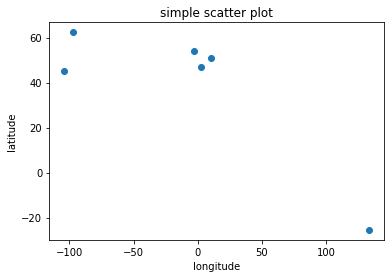

In [52]:
plt.scatter(x=df['Longitude'],y=df['Latitude'])
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('simple scatter plot')

In [53]:
#modeling

from sklearn.cluster import KMeans

In [54]:
model=KMeans(n_clusters=3)   #default n cluster size is 2

In [55]:
model.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [56]:
#clustering

clusters=model.predict(x)

In [57]:
clusters

array([0, 0, 2, 2, 2, 1], dtype=int32)

In [58]:
#copying data
new_df=df.copy()

In [59]:
#new column
new_df['clusters']=clusters

In [60]:
new_df

,Country,Latitude,Longitude,Language,clusters
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,2
3,UK,54.01,-2.53,English,2
4,Germany,51.15,10.40,German,2
5,Australia,-25.45,133.11,English,1


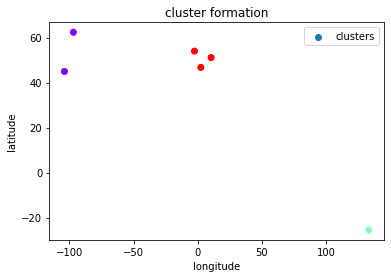

In [65]:
#cluster plotting



plt.scatter(x=new_df['Longitude'],y=new_df['Latitude'],c=new_df['clusters'],cmap='rainbow')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('cluster formation')
plt.legend(['clusters'])

In [68]:
#finding optimal number of clusters

wcss=[]     #within cluster sum of squares   

for i in range(1,5):  #cluster value might be 2 3 5
  model=KMeans(n_clusters=i)   #kmeans(3 or 4 or 2)
  model.fit(x)
  model.predict(x)
  wcss_iter=model.inertia_   #inertia gives the sum of squares within cluster
  wcss.append(wcss_iter)      

wcss

[42601.91356666667, 13205.758119999999, 288.1052333333333, 111.91233333333332]

Text(0.5, 1.0, '')

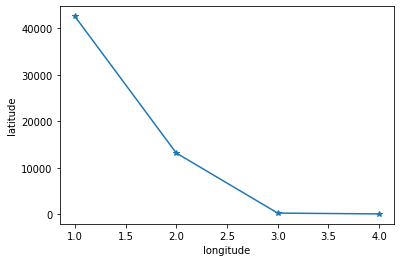

In [70]:

plt.plot(range(1,5),wcss,marker='*')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('')